In [1]:
from el_lib import Alpha

import networkx as nx

import pandas as pd

import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib import animation
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d   

from scipy.linalg import eigh, eig, fractional_matrix_power
from scipy.sparse.linalg import eigsh, eigs
from scipy.sparse import csgraph

from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score


from tqdm import tqdm

import copy
import math

In [3]:
graph = nx.read_graphml("../worm_clusterization/Data/C.elegans_connectome_updated.graphml")
NeuronData = pd.read_excel("../worm_clusterization/Data/NeuronType.xls")
twoD_pos = pd.read_csv("../worm_clusterization/Data/white-etal-celegans-neuron-position.sorted.csv")
threeD_pos = pd.read_csv("../worm_clusterization/Data/3D_coordinates_celegans.csv")

In [3]:
NeuronData.head()

Neuron  Soma Position Soma Region  Span   Ambiguity   TotHead  TotTail  \
0   ADAL           0.21           H      S         NaN       47        0   
1   ADAR           0.21           H      S         NaN       40        0   
2   ADEL           0.21           H      S         NaN       57        0   
3   ADER           0.21           H      S         NaN       51        0   
4   ADFL           0.13           H      L         NaN       52        0   

   TotMid  S_Head  R_Head  S_Mid  R_Mid  S_Tail  R_Tail  \
0       0      33       8      0      0       0       0   
1       0      24      10      0      0       0       0   
2       0      45      10      0      0       0       0   
3       0      38      12      0      0       0       0   
4       0      39      12      0      0       0       0   

   AY Ganglion Designation   AYNbr   
0                        E      141  
1                        E      142  
2                        E      143  
3                        E      144  
4                        C       45

In [4]:
#creating an object for connectome processing
pipeline_object = Alpha(graph)

In [45]:
soma_positions = np.array(NeuronData['Soma Position'])
x_pos = pipeline_object.meta_clusters('x')
y_pos = pipeline_object.meta_clusters('y')
z_pos = pipeline_object.meta_clusters('z')
ganglias = pipeline_object.meta_clusters('ganglia')
role_clusters = pipeline_object.meta_clusters('role')
neurotrans_clusters = pipeline_object.meta_clusters('nerotransmitters')
neurons = pipeline_object.meta_clusters('neurons')

In [6]:
#just cosmetic relabling
ganglia_clusters = [6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 5, 0, 0, 9, 9, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 3, 3, 3, 3, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 8, 8, 0, 0, 5, 5, 8, 8, 6, 7, 7, 7, 7, 7, 7, 2, 2, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 2, 4, 4, 4, 6, 6, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 2, 2, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 9, 9, 2, 2, 9, 9, 9, 2, 9, 9, 3, 3, 3, 3, 3, 3, 5, 6, 6, 6, 6, 1, 3, 3, 8, 8, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 8, 8, 8, 8, 1, 1, 6, 6, 1, 1, 1, 1, 3, 3, 6, 6, 6, 0, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 8, 8, 8, 8, 8, 8, 5, 5, 8, 8, 8, 8, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2]

In [7]:
#adjacency matrix from the netwrokx graph object
adj = pipeline_object.adjacency_mat()

# Analysis starts here

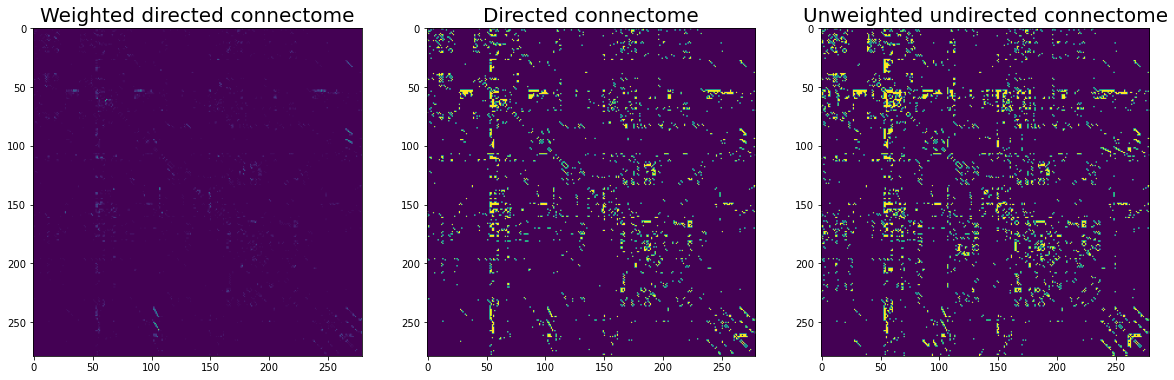

In [26]:
adj_di, adj_sym = pipeline_object.preprocessing_matrix(adj)

fig, axs = plt.subplots(1, 3,figsize=(20,20))
axs[0].imshow(adj)
axs[0].set_title('Weighted directed connectome', size=20)
axs[1].imshow(adj_di)
axs[1].set_title('Directed connectome', size=20)
axs[2].imshow(adj_sym)
axs[2].set_title('Unweighted undirected connectome', size=20)
plt.show()

In [9]:
all_edg_sym = pipeline_object.edges_extracting(adj_sym)
# let's check that all edges are unique
len(np.unique(all_edg_sym,axis=1)) == len(all_edg_sym)

True

# Laplacians

In [12]:
laplac_sym = csgraph.laplacian(adj_sym)

In [13]:
vecs_laplac, colours_laplac = pipeline_object.clusters_laplac(adj_sym, 9)

In [14]:
#normalized laplacian
vecs_laplac_norm, colours_laplac_norm = pipeline_object.clusters_norm_laplac(adj_sym, 9)

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:194: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)


In [15]:
#normalized laplacian 2nd version 
vecs_laplac_norm_alisa, colours_laplac_norm_alisa = pipeline_object.clusters_norm_laplac_alisa(adj_sym, 9)

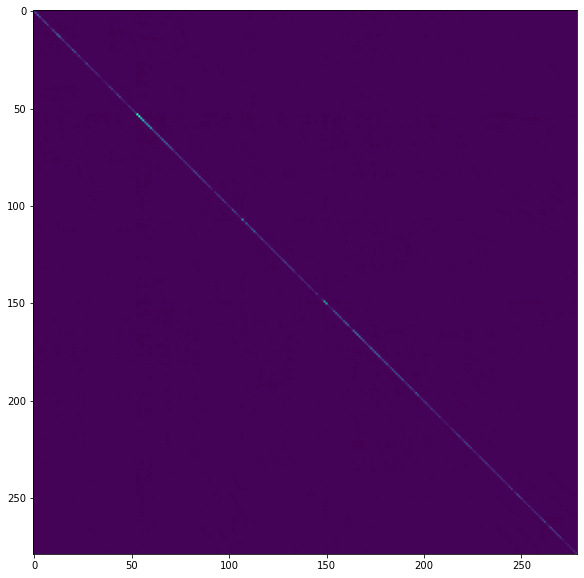

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(laplac_sym)
plt.show()

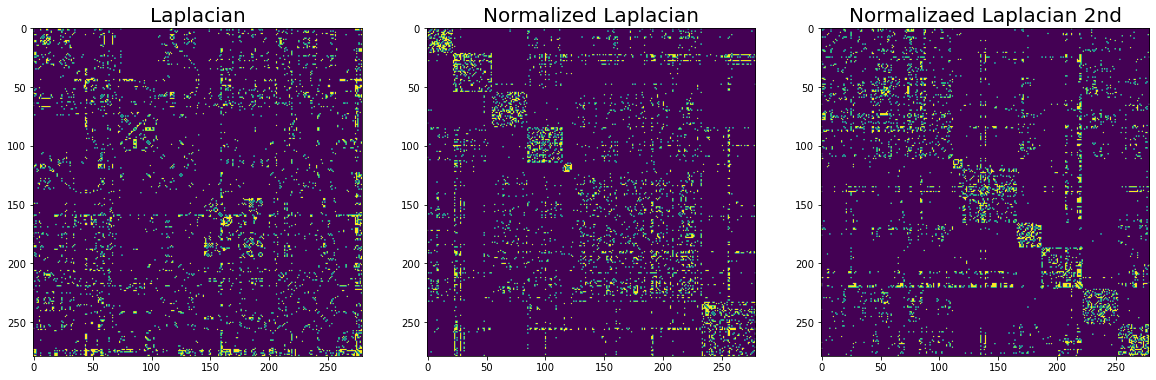

In [20]:
#connectom sorted by 7 clusters 
mat_sort_lapl = pipeline_object.order_matrix(adj_sym, colours_laplac[5])
mat_sort_lapl_norm = pipeline_object.order_matrix(adj_sym, colours_laplac_norm[5])
mat_sort_lapl_norm_alisa = pipeline_object.order_matrix(adj_sym, colours_laplac_norm_alisa[5])

fig, axs = plt.subplots(1, 3,figsize=(20,20))

axs[0].imshow(mat_sort_lapl)
axs[0].set_title('Laplacian', size=20)
axs[1].imshow(mat_sort_lapl_norm)
axs[1].set_title('Normalized Laplacian', size=20)
axs[2].imshow(mat_sort_lapl_norm_alisa)
axs[2].set_title('Normalizaed Laplacian 2nd', size=20)

plt.show()

# Modularity matrix

In [18]:
M = pipeline_object.modularity_matrix(adj_sym)
clusters_modularity = pipeline_object.clusters_modularity_matrix(M, 9)

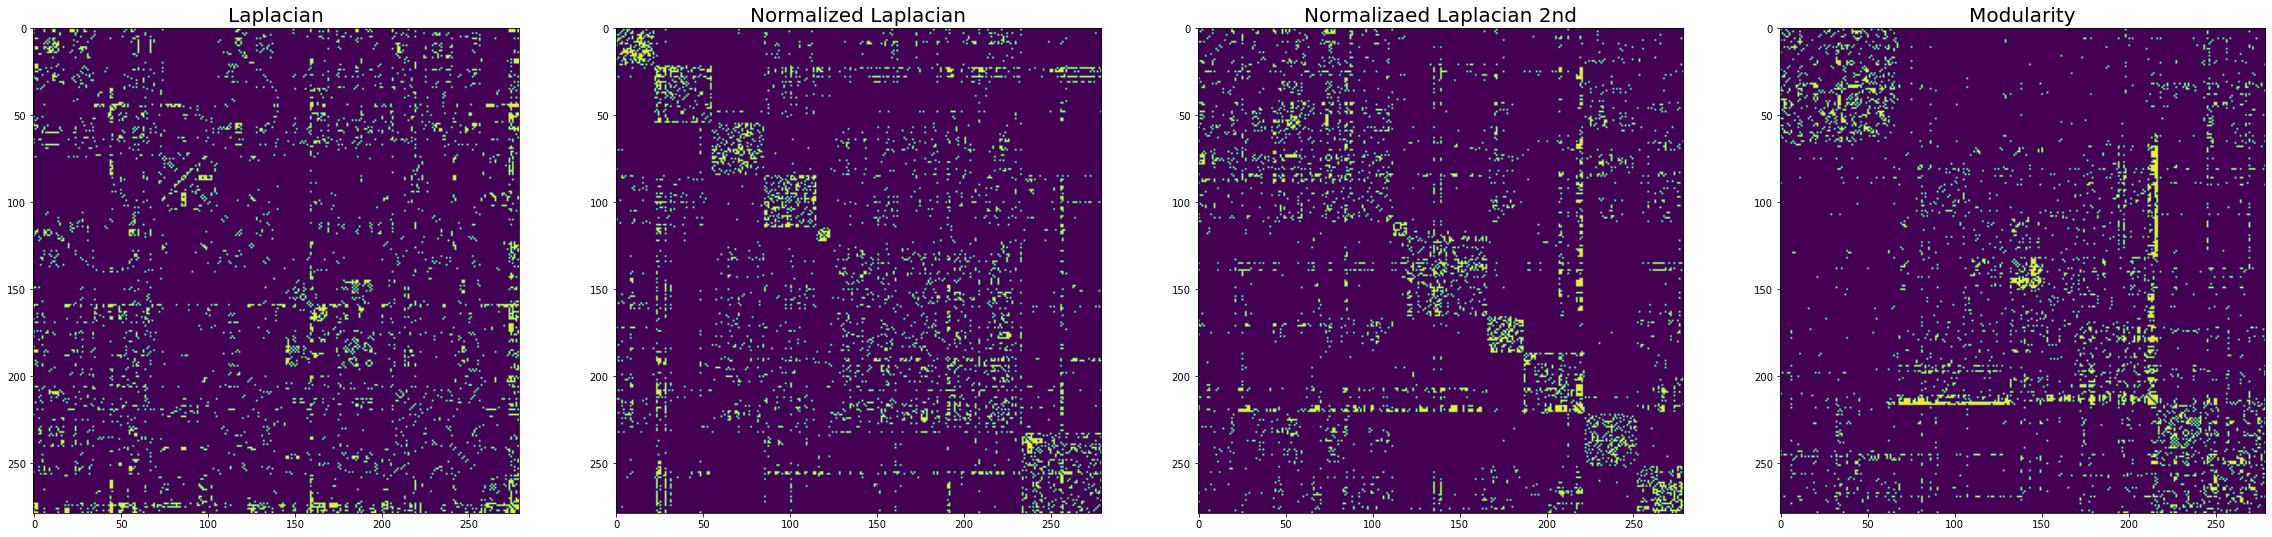

In [22]:
mat_sort_modul = pipeline_object.order_matrix(adj_sym, clusters_modularity[5])

fig, axs = plt.subplots(1, 4,figsize=(40,10))

axs[0].imshow(mat_sort_lapl)
axs[0].set_title('Laplacian', size=20)
axs[1].imshow(mat_sort_lapl_norm)
axs[1].set_title('Normalized Laplacian', size=20)
axs[2].imshow(mat_sort_lapl_norm_alisa)
axs[2].set_title('Normalizaed Laplacian 2nd', size=20)
axs[3].imshow(mat_sort_modul)
axs[3].set_title('Modularity', size=20)

plt.show()

# Non-backtracking matrix and Flow matrix 

In [23]:
nb_matrix = pipeline_object.nonback(all_edg_sym)

In [24]:
flow_matrix = pipeline_object.flowmat(adj_sym, nb_matrix, all_edg_sym)

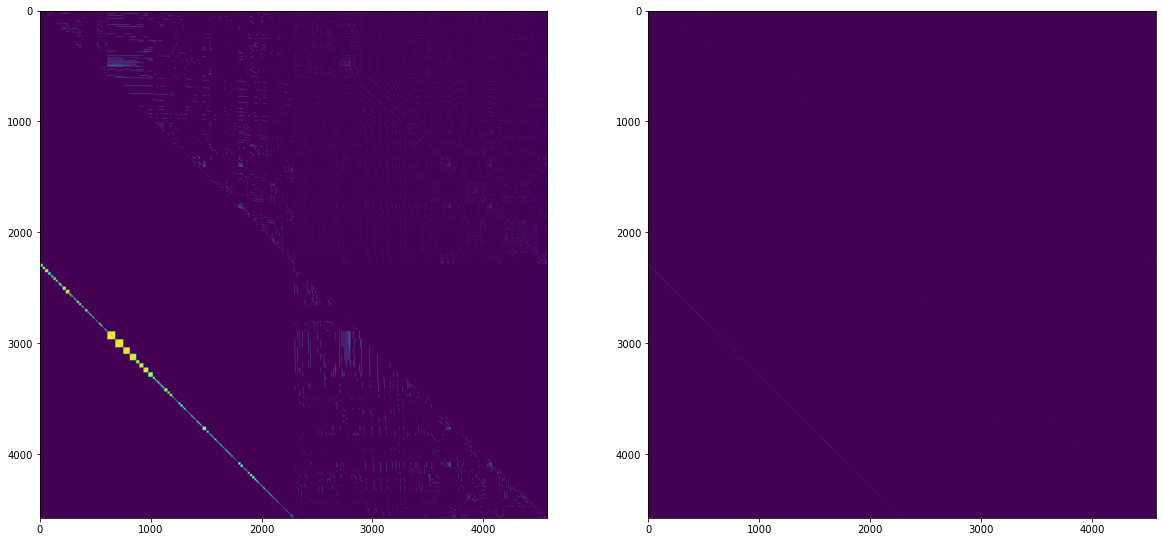

In [25]:
fig, axs = plt.subplots(1, 2,figsize=(20,20))
axs[0].imshow(nb_matrix)
axs[1].imshow(flow_matrix)

plt.show()

In [27]:
#spectra of non-backtracking matrix
#we are taking only largest real-valued eigen values because we've seen the spectra tail of the flow matrix 
vals_nb, vecs_nb =  eigs(flow_matrix, k = 10, which='LR')

#spectra of flow matrix
vals_flow, vecs_flow =  eigs(flow_matrix, k = 10, which='LR')

In [28]:
#translation from eigenvectors of flowmatrix to eigenvectors of original connectome
vals_sorted, translated_eig_vec, cr_rad, tail = pipeline_object.translation_eig_vec(vals_flow, vecs_flow, all_edg_sym, adj_sym, 10)

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[edges[i][0],k] += vecs[i,k]


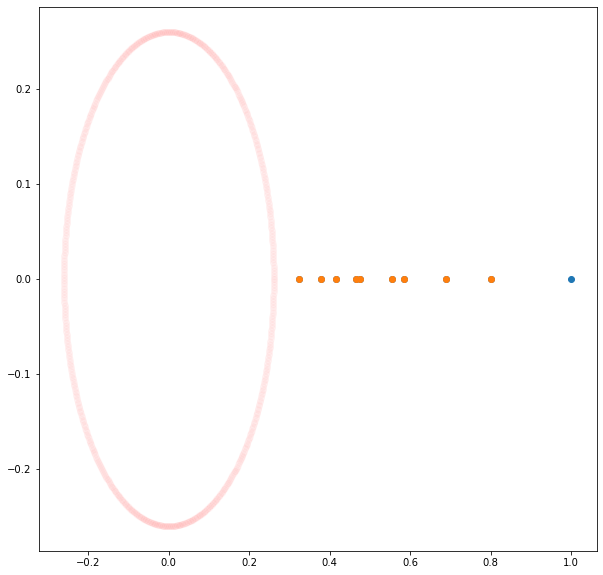

In [33]:
#critical radius
theta = np.linspace(0,2*np.pi,1000)

plt.figure(figsize = (10,10))
plt.scatter(vals_flow.real, vals_flow.imag)
plt.scatter(vals_sorted.real, vals_sorted.imag)
plt.scatter(cr_rad*np.cos(theta),cr_rad*np.sin(theta), color='r', alpha=0.02)
plt.show()

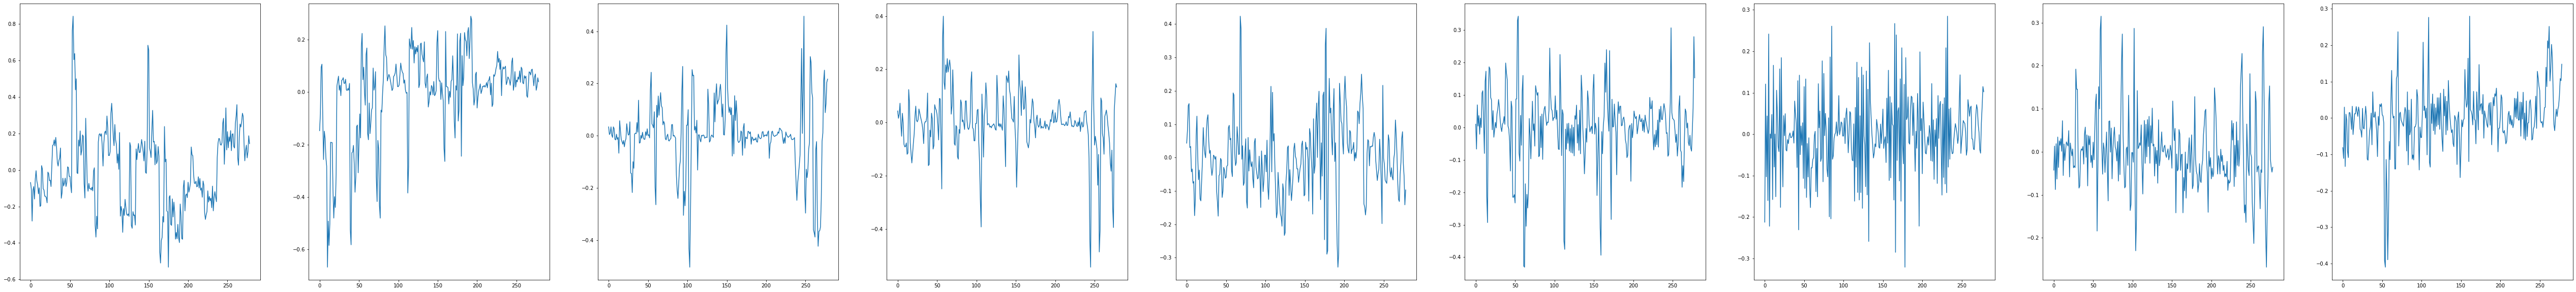

In [30]:
#Eigenvectors after translation 
fig, ax = plt.subplots(1, translated_eig_vec.shape[1], figsize = (90,10))
for i in range(translated_eig_vec.shape[1]): 
  ax[i].plot(translated_eig_vec[:,i])

plt.show()

In [31]:
fm_cl_all = pipeline_object.fm_clusters_all(translated_eig_vec)
fm_cl_pervec = pipeline_object.fm_clusters_pervec(translated_eig_vec)

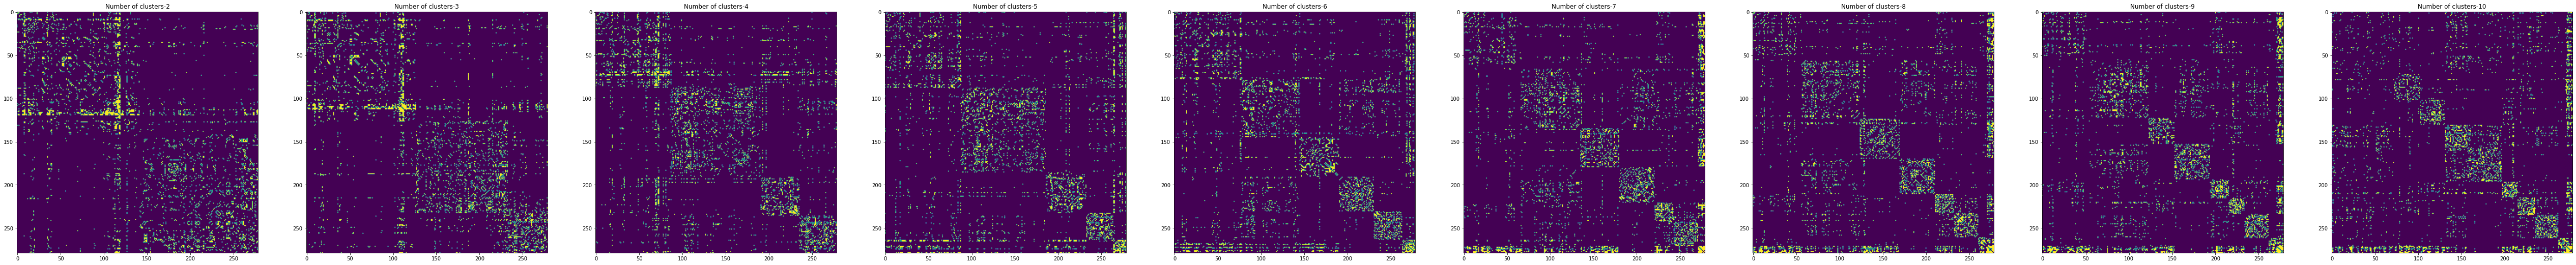

In [34]:
fig,ax = plt.subplots(1,len(fm_cl_all), figsize=(90,10))
for k in range(len(fm_cl_all)):
    mat_sorted = pipeline_object.order_matrix(adj_sym, fm_cl_all[k])
    ax[k].imshow(mat_sorted)
    ax[k].title.set_text(f'Number of clusters-{k+2}')

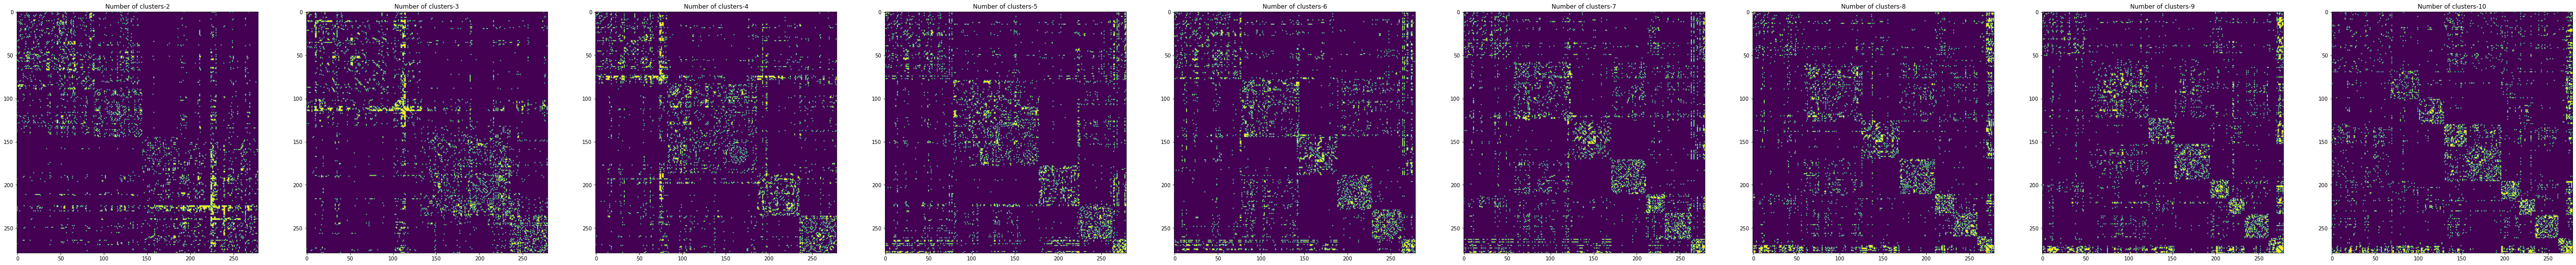

In [35]:
fig,ax = plt.subplots(1,len(fm_cl_pervec), figsize=(90,10))
for k in range(len(fm_cl_pervec)):
    mat_sorted = pipeline_object.order_matrix(adj_sym, fm_cl_pervec[k])
    ax[k].imshow(mat_sorted)
    ax[k].title.set_text(f'Number of clusters-{k+2}')

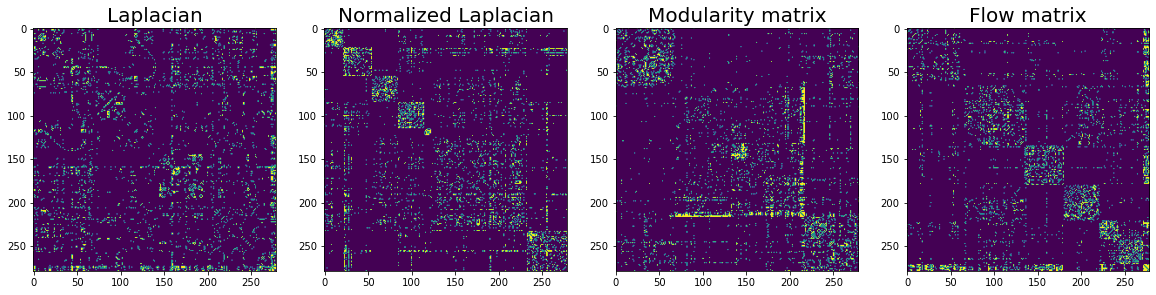

In [36]:
mat_sorted_fm_all = pipeline_object.order_matrix(adj_sym, fm_cl_all[5])
mat_sorted_fm_per = pipeline_object.order_matrix(adj_sym, fm_cl_pervec[5])


fig, axs = plt.subplots(1, 4,figsize=(20,20))

axs[0].imshow(mat_sort_lapl)
axs[0].set_title('Laplacian', size=20)
axs[1].imshow(mat_sort_lapl_norm)
axs[1].set_title('Normalized Laplacian', size=20)
axs[2].imshow(mat_sort_modul)
axs[2].set_title('Modularity matrix', size=20)
axs[3].imshow(mat_sorted_fm_all)
axs[3].set_title('Flow matrix', size=20)
plt.show()

# W_in and W_out of worm connectome

In [38]:
subgr = pipeline_object.subgraphs(fm_cl_pervec[4])
edges_in, edges_in_all, edges_out, probability_in, probability_out, graph_final = pipeline_object.emp_probabilities(subgr, adj_sym)
print(f'Empirical probability for clusterization by Flow matrix:  w_in {probability_in} and w_out {probability_out}')

Empirical probability for clusterization by Flow matrix:  w_in 0.15864059834667366 and w_out 0.03459563543003851


In [37]:
subgr_laplac_norm = pipeline_object.subgraphs(colours_laplac_norm[4])
edges_in_l_norm, edges_in_all_l_norm, edges_out_l_norm, probability_in_l_norm, probability_out_l_norm, graph_final_l_norm = pipeline_object.emp_probabilities(subgr_laplac_norm, adj_sym)
print(f'Empirical probability for clusterization by Normalized Laplacian:  w_in {probability_in_l_norm} and w_out {probability_out_l_norm}')

Empirical probability for clusterization by Normalized Laplacian:  w_in 0.1287450942854408 and w_out 0.03324627655819863


In [39]:
subgr_laplac_norm = pipeline_object.subgraphs(clusters_modularity[4])
edges_in_m, edges_in_all_m, edges_out_m, probability_in_m, probability_out_m, graph_final_m = pipeline_object.emp_probabilities(subgr_laplac_norm, adj_sym)
print(f'Empirical probability for clusterization by Modular matrix:  w_in {probability_in_m} and w_out {probability_out_m}')

Empirical probability for clusterization by Modular matrix:  w_in 0.11418643661634316 and w_out 0.0438311154920322


# Optimal cluster number and resolution limits for such networks

In [40]:
c_in, c_out, w_in, w_out, c, optimal_clusters = pipeline_object.cluster_limit(fm_cl_all, adj_sym)

In [41]:
for i in range(np.shape(optimal_clusters)[0]):
    if optimal_clusters[i,0] > optimal_clusters[i,1]:
        print(f'Number of clusters {int(optimal_clusters[i,2])}: {round(optimal_clusters[i,0],3)} > {round(optimal_clusters[i,1],3)}')
    else:
        print(f'Number of clusters {int(optimal_clusters[i,2])}: {round(optimal_clusters[i,0],3)} < {round(optimal_clusters[i,1],3)}')

Number of clusters 2: 22.856 > 8.122
Number of clusters 3: 27.397 > 13.362
Number of clusters 4: 32.473 > 19.391
Number of clusters 5: 28.358 > 24.057
Number of clusters 6: 34.196 > 31.052
Number of clusters 7: 33.492 < 36.512
Number of clusters 8: 36.905 < 42.984
Number of clusters 9: 39.138 < 49.407
Number of clusters 10: 34.843 < 53.99


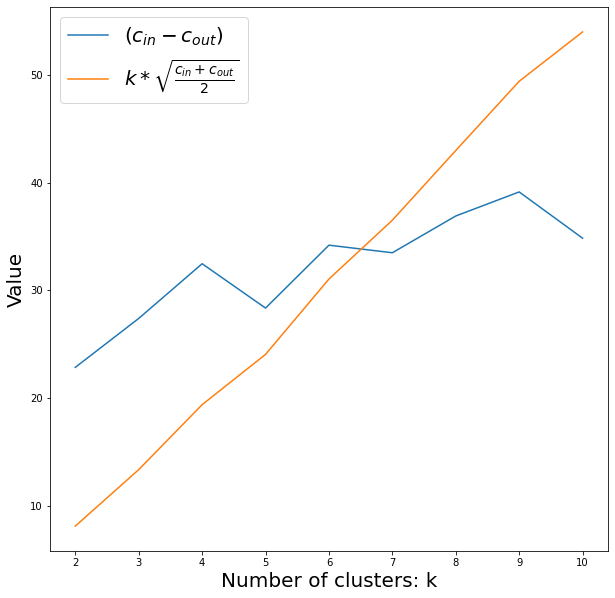

In [42]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of clusters: k', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.plot(range(2,11), optimal_clusters[:,0], label=r'$(c_{in} - c_{out})$')
plt.plot(range(2,11), optimal_clusters[:,1], label=r'$k * \sqrt{\frac{c_{in} + c_{out}}{2}}$')
plt.legend(loc="upper left", fontsize=20)
plt.show()

# Mean c_in, c_out, w_in, w_out

In [49]:
mean_partition_pv, mean_partition_all, w, clusters_all, clusters_pv = pipeline_object.mean_optimal_cluster(translated_eig_vec, 200, adj_sym, fm_cl_pervec, fm_cl_all)

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.p

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.p

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.p

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.p

C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.py:196: RuntimeWarning: divide by zero encountered in power
  D_power = np.nan_to_num(np.power(D, -1/2), posinf=0.0)
C:\Users\arsen\Documents\C.elegans project\Notebooks\el_lib\__init__.p

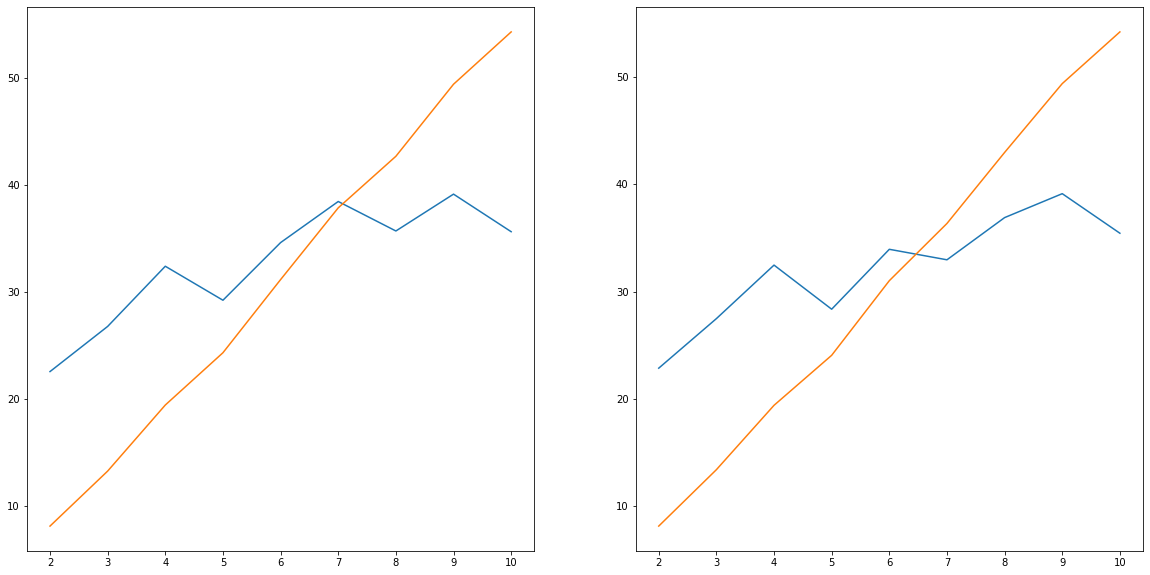

In [50]:
#intersection at 7 clusters -- resolution limit
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(range(2,11), mean_partition_pv[:,0])
ax[0].plot(range(2,11), mean_partition_pv[:,1])

ax[1].plot(range(2,11), mean_partition_all[:,0])
ax[1].plot(range(2,11), mean_partition_all[:,1])

plt.show()

# Mean MI, ARS, AMI between spectral clusters and metadata

In [85]:
mean_AMI_ARS_ganglion_fm, mean_AMI_ARS_ganglion_nl, mean_AMI_ARS_ganglion_m = mean_MI_ARS_scores(adj_sym, ganglia_clusters, translated_eig_vec, iterations=1000)
mean_AMI_ARS_role_fm, mean_AMI_ARS_role_nl, mean_AMI_ARS_role_m = mean_MI_ARS_scores(adj_sym, role_clusters, translated_eig_vec, iterations=1000)
mean_AMI_ARS_neurotrans_fm, mean_AMI_ARS_neurotrans_nl, mean_AMI_ARS_neurotrans_m = mean_MI_ARS_scores(adj_sym, neurotrans_clusters, translated_eig_vec, iterations=1000)

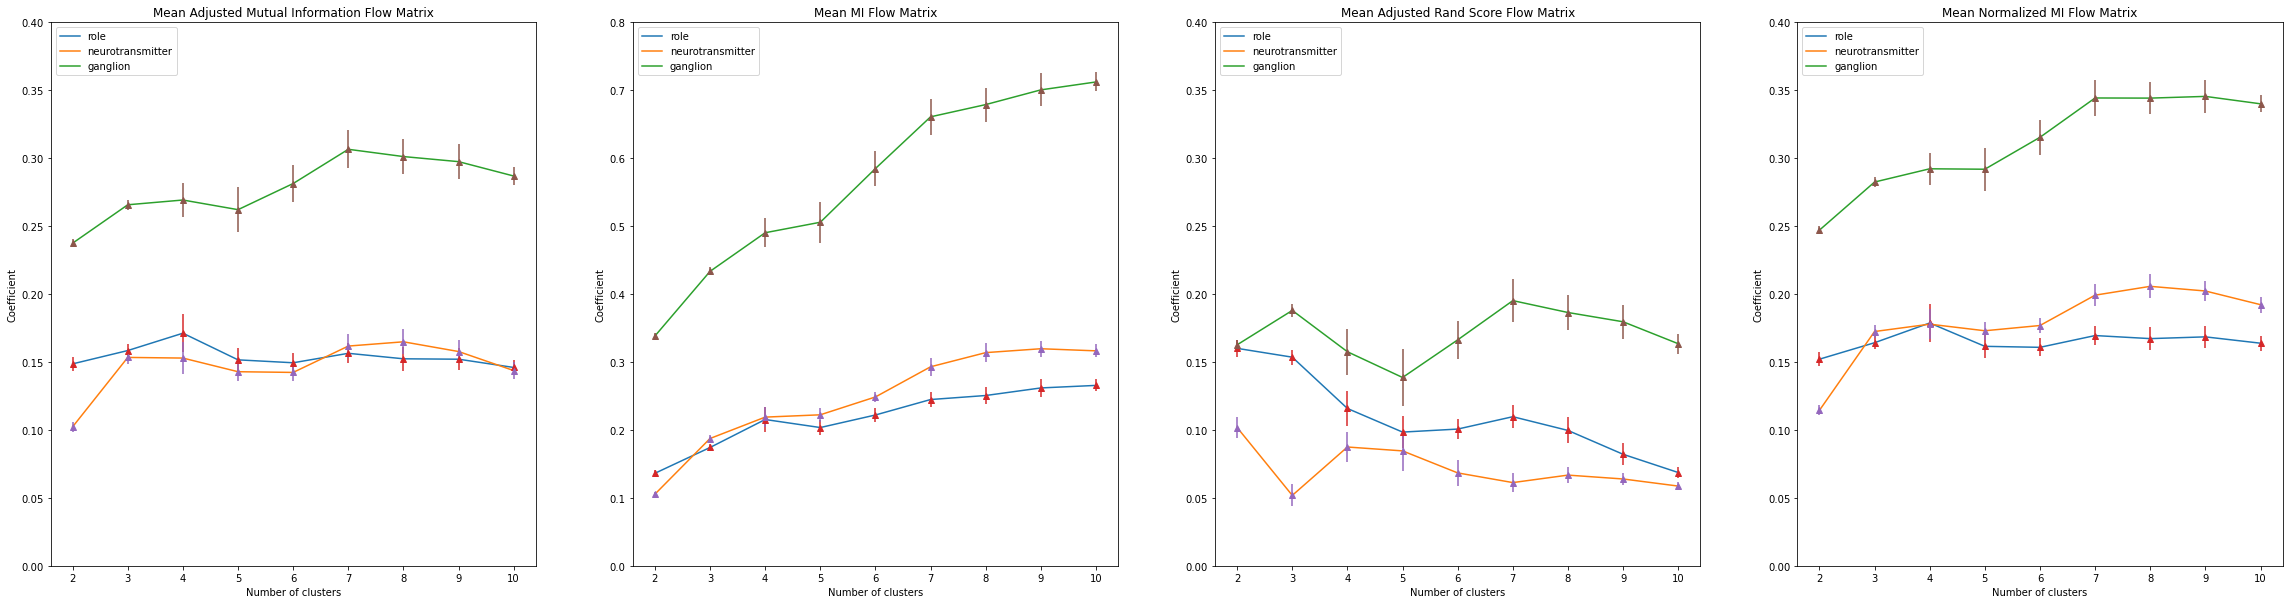

In [86]:
fig,ax = plt.subplots(1,4, figsize=(40,10))

ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('Coefficient') 
ax[0].set_ylim([0, 0.4])
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_role_fm[0],axis=1), label="role")
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[0],axis=1), label='neurotransmitter')
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[0],axis=1), label='ganglion')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_fm[0],axis=1), np.std(mean_AMI_ARS_role_fm[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[0],axis=1), np.std(mean_AMI_ARS_neurotrans_fm[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[0],axis=1), np.std(mean_AMI_ARS_ganglion_fm[0],axis=1), linestyle='None', marker='^')
ax[0].title.set_text('Mean Adjusted Mutual Information Flow Matrix')
ax[0].legend(loc="upper left")

ax[1].set_xlabel('Number of clusters') 
ax[1].set_ylabel('Coefficient') 
ax[1].set_ylim([0, 0.8])
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_role_fm[1],axis=1), label="role")
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[1],axis=1), label='neurotransmitter')
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[1],axis=1), label='ganglion')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_fm[1],axis=1), np.std(mean_AMI_ARS_role_fm[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[1],axis=1), np.std(mean_AMI_ARS_neurotrans_fm[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[1],axis=1), np.std(mean_AMI_ARS_ganglion_fm[1],axis=1), linestyle='None', marker='^')
ax[1].title.set_text('Mean MI Flow Matrix')
ax[1].legend(loc="upper left")

ax[2].set_xlabel('Number of clusters') 
ax[2].set_ylabel('Coefficient') 
ax[2].set_ylim([0, 0.4])
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_role_fm[2],axis=1), label="role")
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[2],axis=1), label='neurotransmitter')
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[2],axis=1), label='ganglion')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_fm[2],axis=1), np.std(mean_AMI_ARS_role_fm[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[2],axis=1), np.std(mean_AMI_ARS_neurotrans_fm[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[2],axis=1), np.std(mean_AMI_ARS_ganglion_fm[2],axis=1), linestyle='None', marker='^')
ax[2].title.set_text('Mean Adjusted Rand Score Flow Matrix')
ax[2].legend(loc="upper left")

ax[3].set_xlabel('Number of clusters') 
ax[3].set_ylabel('Coefficient') 
ax[3].set_ylim([0, 0.4])
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_role_fm[3],axis=1), label="role")
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[3],axis=1), label='neurotransmitter')
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[3],axis=1), label='ganglion')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_fm[3],axis=1), np.std(mean_AMI_ARS_role_fm[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_fm[3],axis=1), np.std(mean_AMI_ARS_neurotrans_fm[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_fm[3],axis=1), np.std(mean_AMI_ARS_ganglion_fm[3],axis=1), linestyle='None', marker='^')
ax[3].title.set_text('Mean Normalized MI Flow Matrix')
ax[3].legend(loc="upper left")


plt.show()

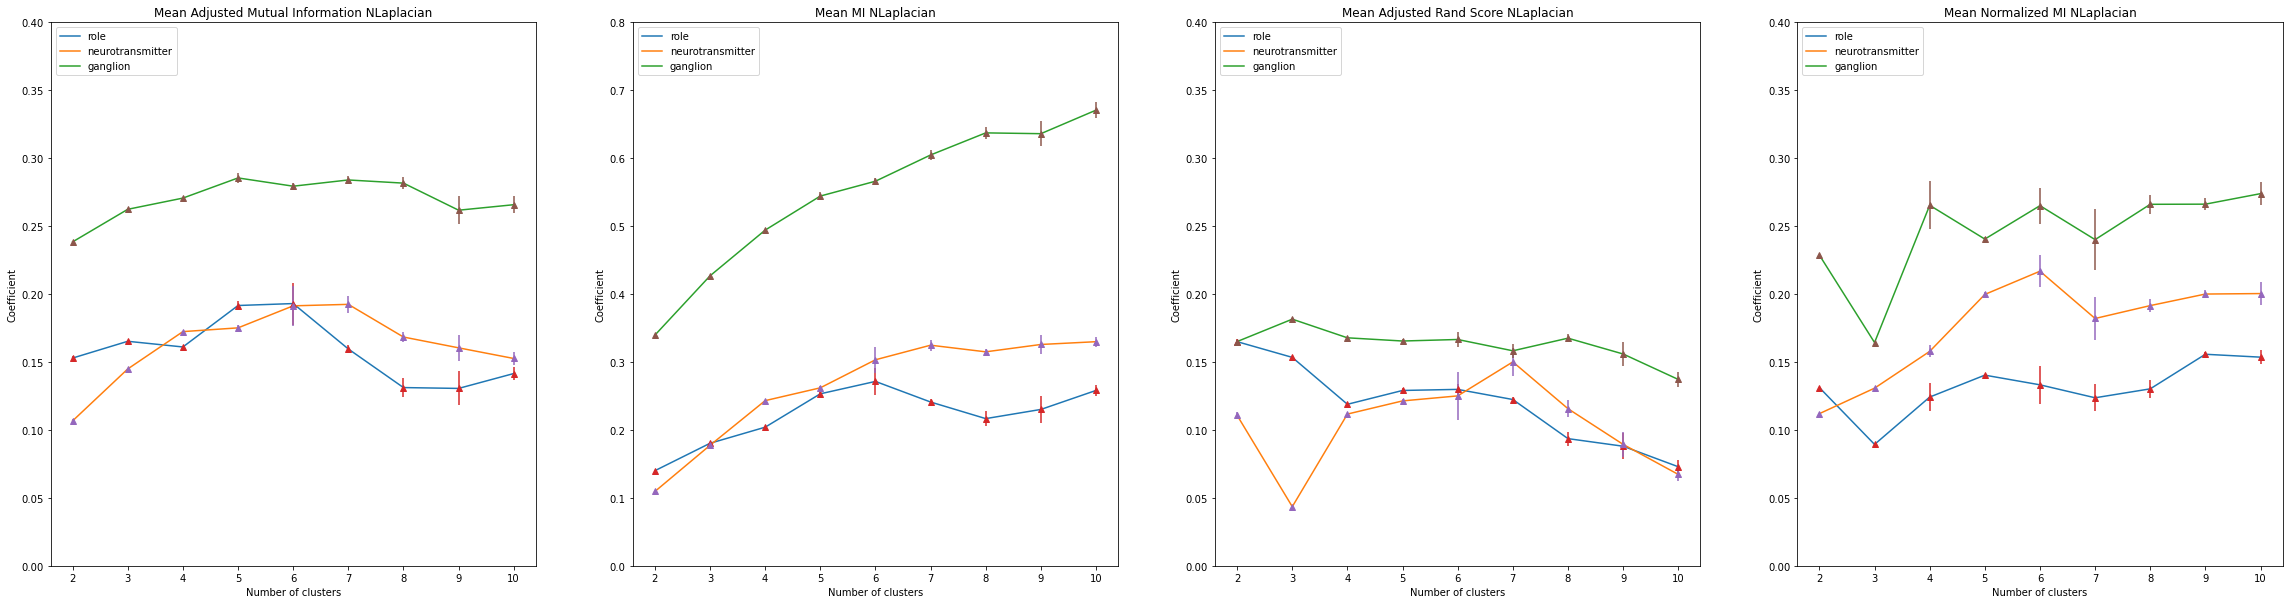

In [87]:
fig,ax = plt.subplots(1,4, figsize=(40,10))

ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('Coefficient') 
ax[0].set_ylim([0, 0.4])
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_role_nl[0],axis=1), label="role")
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[0],axis=1), label='neurotransmitter')
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[0],axis=1), label='ganglion')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_nl[0],axis=1), np.std(mean_AMI_ARS_role_nl[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[0],axis=1), np.std(mean_AMI_ARS_neurotrans_nl[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[0],axis=1), np.std(mean_AMI_ARS_ganglion_nl[0],axis=1), linestyle='None', marker='^')
ax[0].title.set_text('Mean Adjusted Mutual Information NLaplacian')
ax[0].legend(loc="upper left")

ax[1].set_xlabel('Number of clusters') 
ax[1].set_ylabel('Coefficient') 
ax[1].set_ylim([0, 0.8])
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_role_nl[1],axis=1), label="role")
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[1],axis=1), label='neurotransmitter')
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[1],axis=1), label='ganglion')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_nl[1],axis=1), np.std(mean_AMI_ARS_role_nl[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[1],axis=1), np.std(mean_AMI_ARS_neurotrans_nl[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[1],axis=1), np.std(mean_AMI_ARS_ganglion_nl[1],axis=1), linestyle='None', marker='^')
ax[1].title.set_text('Mean MI NLaplacian')
ax[1].legend(loc="upper left")

ax[2].set_xlabel('Number of clusters') 
ax[2].set_ylabel('Coefficient') 
ax[2].set_ylim([0, 0.4])
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_role_nl[2],axis=1), label="role")
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[2],axis=1), label='neurotransmitter')
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[2],axis=1), label='ganglion')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_nl[2],axis=1), np.std(mean_AMI_ARS_role_nl[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[2],axis=1), np.std(mean_AMI_ARS_neurotrans_nl[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[2],axis=1), np.std(mean_AMI_ARS_ganglion_nl[2],axis=1), linestyle='None', marker='^')
ax[2].title.set_text('Mean Adjusted Rand Score NLaplacian')
ax[2].legend(loc="upper left")

ax[3].set_xlabel('Number of clusters') 
ax[3].set_ylabel('Coefficient') 
ax[3].set_ylim([0, 0.4])
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_role_nl[3],axis=1), label="role")
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[3],axis=1), label='neurotransmitter')
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[3],axis=1), label='ganglion')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_nl[3],axis=1), np.std(mean_AMI_ARS_role_nl[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_nl[3],axis=1), np.std(mean_AMI_ARS_neurotrans_nl[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_nl[3],axis=1), np.std(mean_AMI_ARS_ganglion_nl[3],axis=1), linestyle='None', marker='^')
ax[3].title.set_text('Mean Normalized MI NLaplacian')
ax[3].legend(loc="upper left")


plt.show()

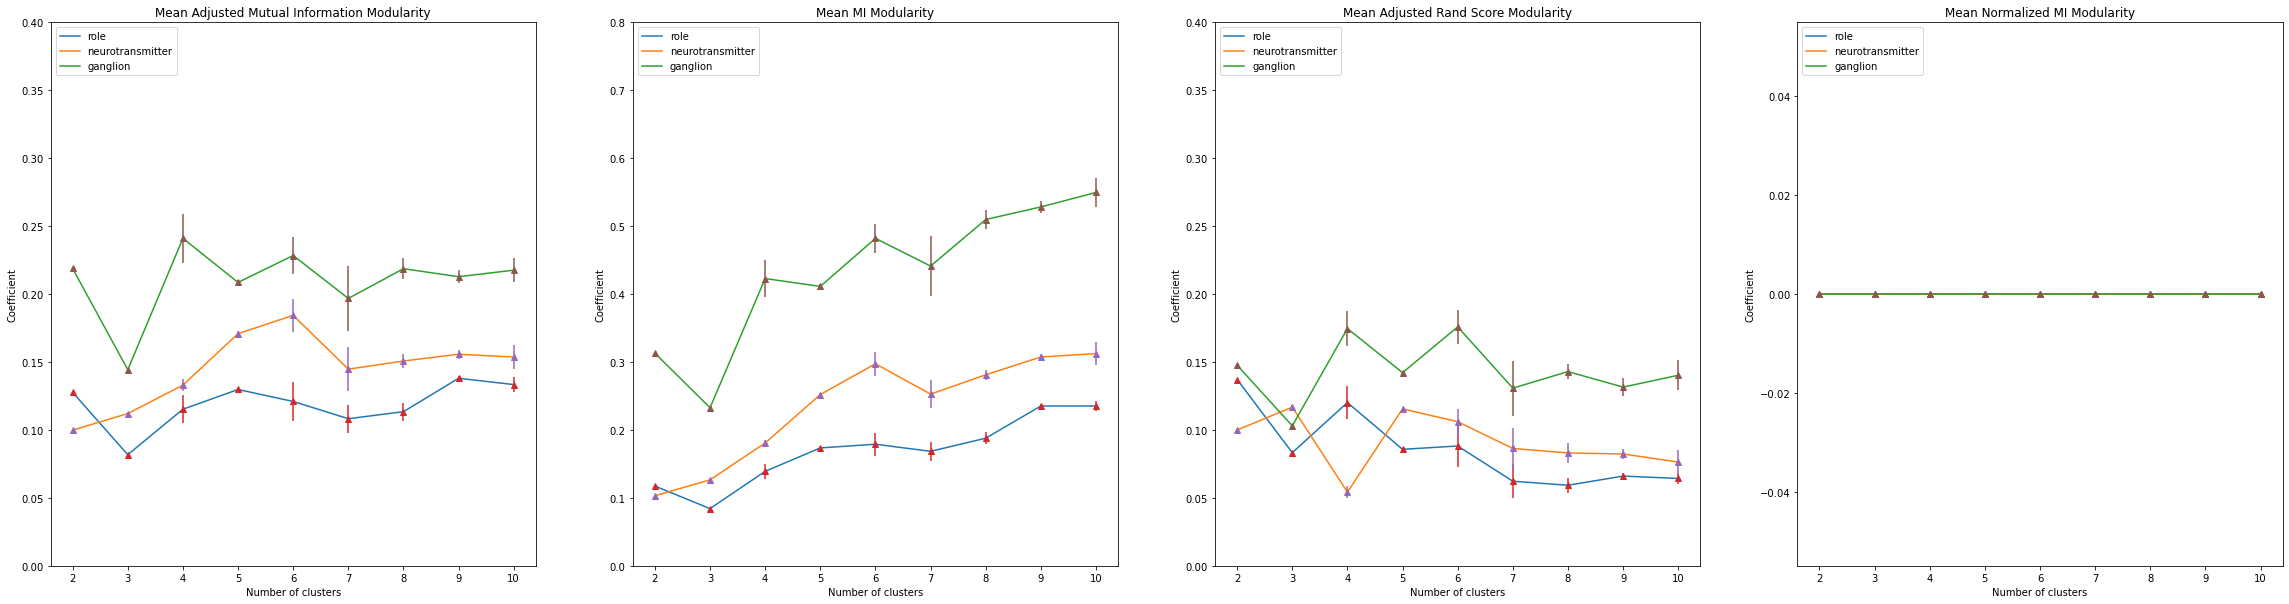

In [88]:
fig,ax = plt.subplots(1,4, figsize=(40,10))

ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('Coefficient') 
ax[0].set_ylim([0, 0.4])
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_role_m[0],axis=1), label="role")
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[0],axis=1), label='neurotransmitter')
ax[0].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[0],axis=1), label='ganglion')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_m[0],axis=1), np.std(mean_AMI_ARS_role_m[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[0],axis=1), np.std(mean_AMI_ARS_neurotrans_m[0],axis=1), linestyle='None', marker='^')
ax[0].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[0],axis=1), np.std(mean_AMI_ARS_ganglion_m[0],axis=1), linestyle='None', marker='^')
ax[0].title.set_text('Mean Adjusted Mutual Information Modularity')
ax[0].legend(loc="upper left")

ax[1].set_xlabel('Number of clusters') 
ax[1].set_ylabel('Coefficient') 
ax[1].set_ylim([0, 0.8])
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_role_m[1],axis=1), label="role")
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[1],axis=1), label='neurotransmitter')
ax[1].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[1],axis=1), label='ganglion')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_m[1],axis=1), np.std(mean_AMI_ARS_role_m[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[1],axis=1), np.std(mean_AMI_ARS_neurotrans_m[1],axis=1), linestyle='None', marker='^')
ax[1].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[1],axis=1), np.std(mean_AMI_ARS_ganglion_m[1],axis=1), linestyle='None', marker='^')
ax[1].title.set_text('Mean MI Modularity')
ax[1].legend(loc="upper left")

ax[2].set_xlabel('Number of clusters') 
ax[2].set_ylabel('Coefficient') 
ax[2].set_ylim([0, 0.4])
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_role_m[2],axis=1), label="role")
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[2],axis=1), label='neurotransmitter')
ax[2].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[2],axis=1), label='ganglion')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_m[2],axis=1), np.std(mean_AMI_ARS_role_m[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[2],axis=1), np.std(mean_AMI_ARS_neurotrans_m[2],axis=1), linestyle='None', marker='^')
ax[2].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[2],axis=1), np.std(mean_AMI_ARS_ganglion_m[2],axis=1), linestyle='None', marker='^')
ax[2].title.set_text('Mean Adjusted Rand Score Modularity')
ax[2].legend(loc="upper left")

ax[3].set_xlabel('Number of clusters') 
ax[3].set_ylabel('Coefficient') 
#ax[3].set_ylim([0, 0.4])
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_role_m[3],axis=1), label="role")
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[3],axis=1), label='neurotransmitter')
ax[3].plot(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[3],axis=1), label='ganglion')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_role_m[3],axis=1), np.std(mean_AMI_ARS_role_m[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_neurotrans_m[3],axis=1), np.std(mean_AMI_ARS_neurotrans_m[3],axis=1), linestyle='None', marker='^')
ax[3].errorbar(range(2,11), np.mean(mean_AMI_ARS_ganglion_m[3],axis=1), np.std(mean_AMI_ARS_ganglion_m[3],axis=1), linestyle='None', marker='^')
ax[3].title.set_text('Mean Normalized MI Modularity')
ax[3].legend(loc="upper left")


plt.show()

# Interpretability of metadata

## Clusters in ganglia

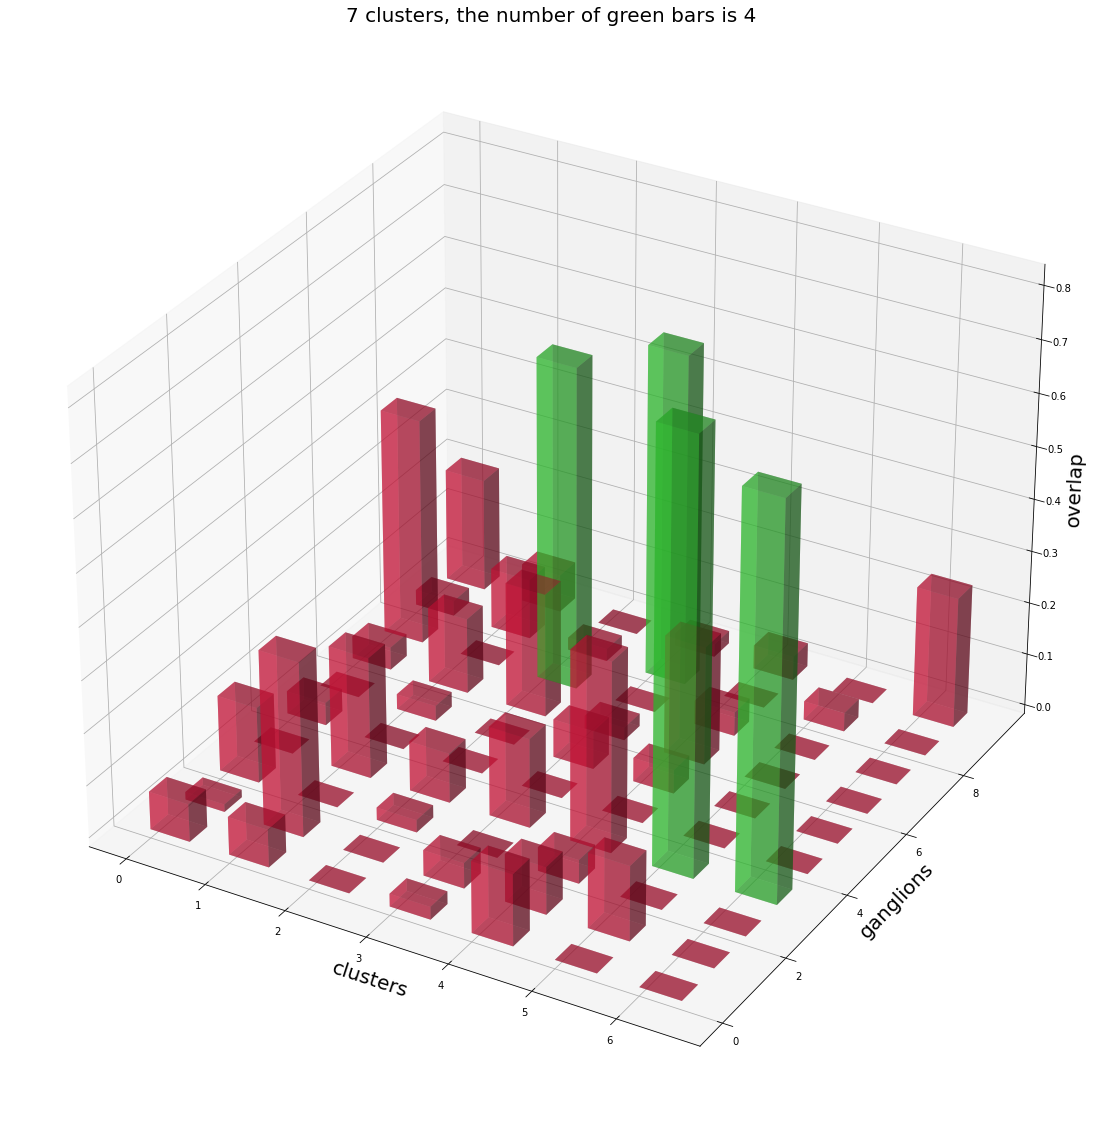

In [78]:
coords_diff_pics(ganglia_clusters, list(fm_cl_all[5]))

# Correlation per degree

In [102]:
corr_di = correlation_deg(adj_di)
corr_sym = correlation_deg(adj_sym)

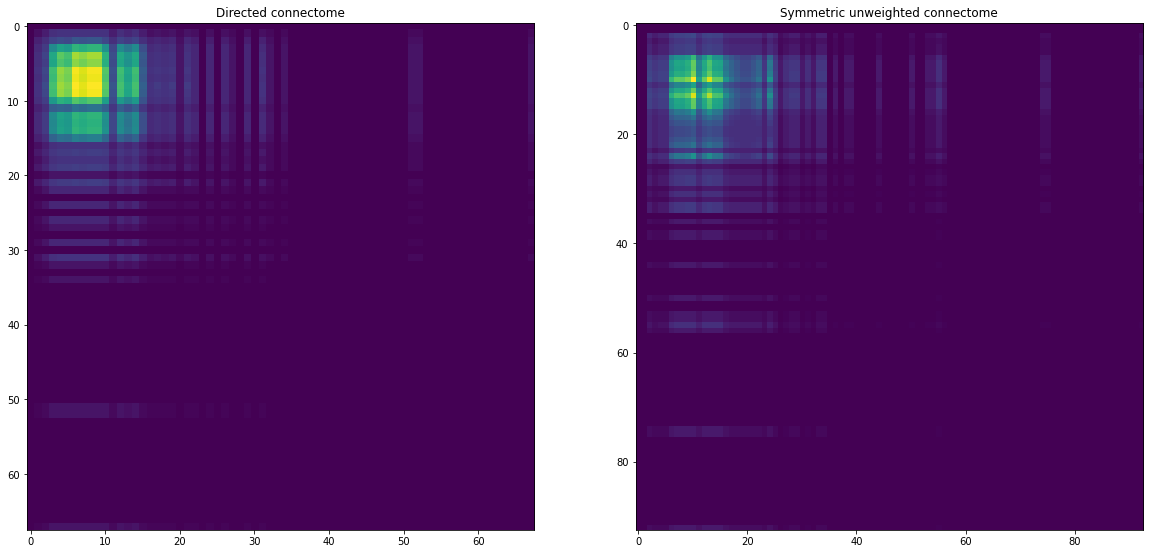

In [103]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(corr_di)
ax[0].title.set_text('Directed connectome')
ax[1].imshow(corr_sym)
ax[1].title.set_text('Symmetric unweighted connectome')
plt.show()

# Probability of contact dependent on the distance between neurons

In [46]:
sorted_by_positions = pipeline_object.order_matrix(adj_sym, soma_positions)
rel_in, rel_out, sum_dist, ps_clusters = pipeline_object.sums_md(sorted_by_positions,fm_cl_all[5])

In [48]:
x = np.array(np.logspace(0, np.log(np.shape(adj_sym)[0]), num=8, base=np.e), dtype=int)
y0 = pipeline_object.ps_bins(pipeline_object.order_matrix(adj_sym, fm_cl_all[4]))
y1 = pipeline_object.ps_bins(pipeline_object.order_matrix(adj_sym, fm_cl_all[5]))
y2 = pipeline_object.ps_bins(pipeline_object.order_matrix(adj_sym, soma_positions))
y3 = pipeline_object.ps_bins(pipeline_object.order_matrix(adj_sym, ganglia_clusters))
y4 = pipeline_object.ps_bins(adj_sym)

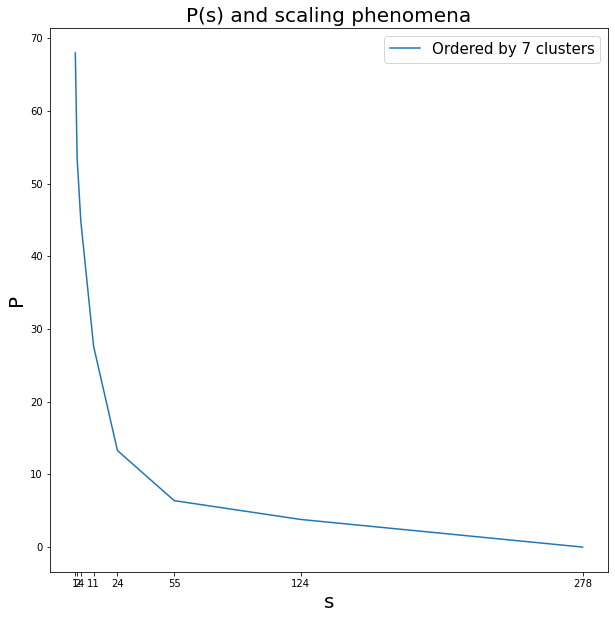

In [51]:
plt.figure(figsize = (10,10))
plt.title('P(s) and scaling phenomena', fontsize=20)
plt.xlabel('s', fontsize=20) 
plt.ylabel('P', fontsize=20)
plt.xticks(x)
#plt.plot(x, y0, label='Ordered by 6 clusters')
plt.plot(x, y1, label='Ordered by 7 clusters')
#plt.plot(x,-13/14*x+500)
plt.legend(loc="upper right", fontsize=15)
plt.show()

## Sorted by ganglia and physical distances

In [53]:
sorted_by_ganglia = pipeline_object.order_matrix(adj_sym, ganglia_clusters)
sorted_by_positions = pipeline_object.order_matrix(adj_sym, soma_positions)

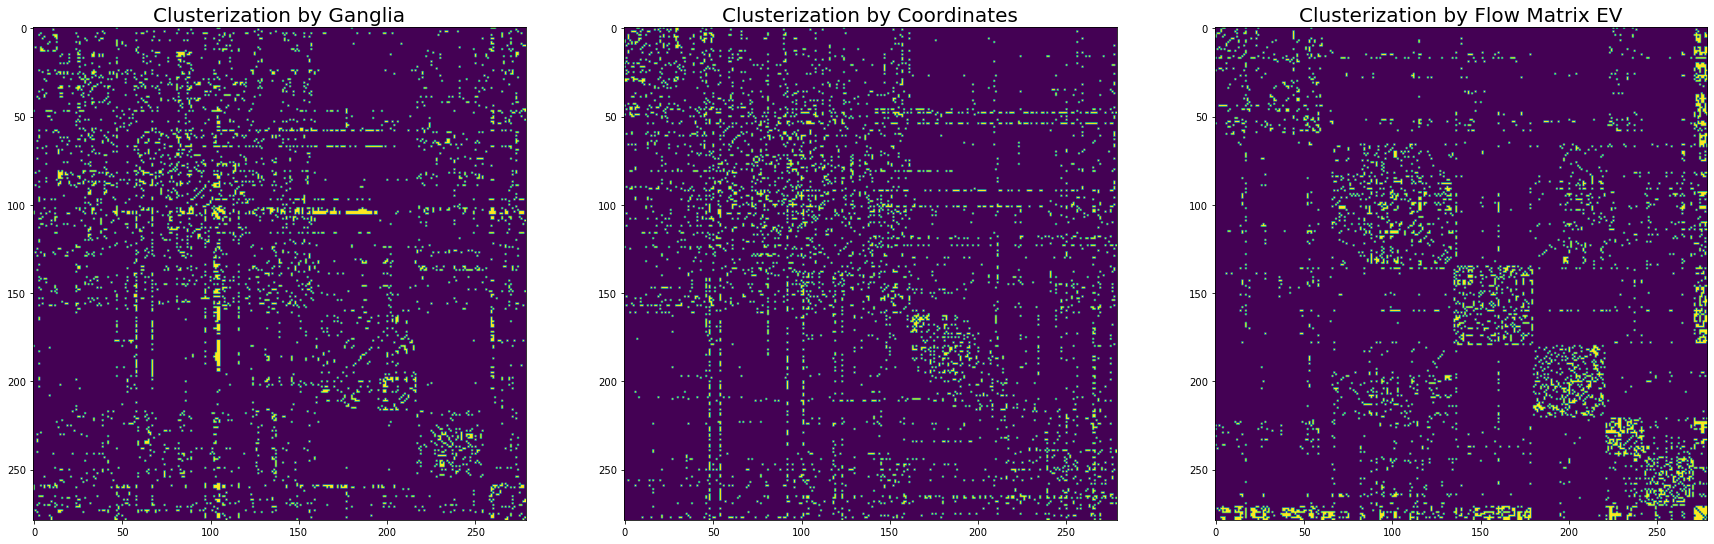

In [55]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(sorted_by_ganglia)
ax[0].set_title('Clusterization by Ganglia', size=20)
ax[1].imshow(sorted_by_positions)
ax[1].set_title('Clusterization by Coordinates', size=20)
ax[2].imshow(pipeline_object.order_matrix(adj_sym, fm_cl_all[5]))
ax[2].set_title('Clusterization by Flow Matrix EV', size=20)
plt.show()